<a href="https://colab.research.google.com/github/Mubashirr101/The_Automator/blob/main/Prototype1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Automator's Initial Prototype Code for EDA

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV files from kaggle

In [ ]:
#importing kaggle dataset
import kagglehub
path = kagglehub.dataset_download("themrityunjaypathak/pandas-practice-dataset")
data = pd.read_csv(f"{path}/data.csv")
data.head()

100%|██████████| 493/493 [00:00<00:00, 412kB/s]

Extracting files...


,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


## Exploratory Data Analysis

### Descriptive Statistics

#### Measures of Central Tendency

In [ ]:
# Measures of Central Tendency : MEAN,MEDIAN,MODE
# code for mean
col_mean = {}
for i in data.select_dtypes(include='number').columns:
    col_mean[i] = data[i].mean()
print(col_mean)

#code for median
col_median={}
for i in data.select_dtypes(include='number').columns:
    col_median[i] = data[i].median()
print(col_median)

#code for mode
col_mode = {}
for i in data.columns:
    col_mode[i] = data[i].mode().tolist()

print(col_mode)

{'Duration': 68.4375, 'Pulse': 103.5, 'Maxpulse': 128.5, 'Calories': 304.68}
{'Duration': 60.0, 'Pulse': 102.5, 'Maxpulse': 127.5, 'Calories': 291.2}
{'Duration': [60], 'Date': ["'2020/12/12'"], 'Pulse': [100], 'Maxpulse': [120], 'Calories': [300.0]}


#### Measures of Variability

In [ ]:
# Measures of Variablility (Dispersion): Range,Variance,SD,IQR,MAD,CV
# Range
Range = {}
for i in data.select_dtypes(include='number').columns:
    Range[i] = data[i].max()-data[i].min()
print('Range: ',Range)

# Variance
Variance = {}
for i in data.select_dtypes(include='number').columns:
    Variance[i] = data[i].var()
print('Var: ',Variance)

# SD
SD={}
for i in data.select_dtypes(include='number').columns:
  SD[i]=data[i].std()
print('SD: ',SD)

#Inter Quartile Range
IQR ={}
for i in data.select_dtypes(include='number').columns:
  IQR[i]=data[i].quantile(0.75)-data[i].quantile(0.25)
print('IQR: ',IQR)

#Mean Absolute Deviation
MAD={}
for i in data.select_dtypes(include='number').columns:
  MAD[i]=abs(data[i]-data[i].mean()).mean()
print('MAD: ',MAD)

# Coefficient of variation
CV={}
for i in data.select_dtypes(include='number').columns:
  CV[i]=data[i].std()/data[i].mean()
print('CV: ',CV)

Range:  {'Duration': 420, 'Pulse': 40, 'Maxpulse': 74, 'Calories': 283.9}
Var:  {'Duration': 4905.544354838709, 'Pulse': 61.354838709677416, 'Maxpulse': 168.96774193548387, 'Calories': 4356.498896551724}
SD:  {'Duration': 70.03959133831886, 'Pulse': 7.8329329570523845, 'Maxpulse': 12.998759246000514, 'Calories': 66.00377941111951}
IQR:  {'Duration': 0.0, 'Pulse': 6.5, 'Maxpulse': 12.25, 'Calories': 93.27500000000003}
MAD:  {'Duration': 23.84765625, 'Pulse': 5.4375, 'Maxpulse': 8.96875, 'Calories': 53.85600000000001}
CV:  {'Duration': 1.0234095538019194, 'Pulse': 0.07568051166234188, 'Maxpulse': 0.10115765950194952, 'Calories': 0.21663312134409712}


#### Measures of Distribution

In [ ]:
# Measures of Distribution :
#skewness
Skewness={}
for i in data.select_dtypes(include='number').columns:
  Skewness[i]=data[i].skew()
print('Skewness: ',Skewness)

# positively/negatively/zero skewed
Pos_Neg_Skew={}
for i in Skewness.keys():
  if Skewness[i]>0:
    Pos_Neg_Skew[i]=1
  elif Skewness[i]<0:
    Pos_Neg_Skew[i]=2
  else:
    Pos_Neg_Skew[i]=0
print('+ve/-ve Skewness: ',Pos_Neg_Skew)

# Kurtosis
Kurtosis = {}
for i in data.select_dtypes(include='number').columns:
    Kurtosis[i] = data[i].kurtosis()
print('Kurtosis: ', Kurtosis)

# Heavy/Light tails classification
# 1 = Heavy Tails (Leptokurtic)
# 0 = Normal Tails (Mesokurtic),
# -1 = Light Tails (Platykurtic)

Heavy_Light_Tail = {}
for i in Kurtosis.keys():
    if Kurtosis[i] > 3:
        Heavy_Light_Tail[i] = 1  # Heavy Tails
    elif Kurtosis[i] < 3:
        Heavy_Light_Tail[i] = -1  # Light Tails
    else:
        Heavy_Light_Tail[i] = 0  # Normal Tails
print('Hvy/Light Tail: ', Heavy_Light_Tail)


#Quantiles
Quantiles={}
for i in data.select_dtypes(include='number').columns:
  Quantiles[i]=data[i].quantile([0.25,0.5,0.75]).tolist()
print('Quantiles: ',Quantiles)

#Deciles
Deciles={}
for i in data.select_dtypes(include='number').columns:
  Deciles[i]=data[i].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).tolist()
print('Deciles: ',Deciles)

Skewness:  {'Duration': 5.548443136530485, 'Pulse': 1.2872394290232436, 'Maxpulse': 1.3567952816219306, 'Calories': 0.6862712303263262}
+ve/-ve Skewness:  {'Duration': 1, 'Pulse': 1, 'Maxpulse': 1, 'Calories': 1}
Kurtosis:  {'Duration': 31.18116358134762, 'Pulse': 3.3334450742764434, 'Maxpulse': 4.566712249802704, 'Calories': 0.13658865719772884}
Hvy/Light Tail:  {'Duration': 1, 'Pulse': 1, 'Maxpulse': 1, 'Calories': -1}
Quantiles:  {'Duration': [60.0, 60.0, 60.0], 'Pulse': [100.0, 102.5, 106.5], 'Maxpulse': [120.0, 127.5, 132.25], 'Calories': [250.7, 291.2, 343.975]}
Deciles:  {'Duration': [45.0, 48.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 450.0], 'Pulse': [97.1, 98.4, 100.0, 100.8, 102.5, 103.0, 104.7, 108.8, 110.0, 130.0], 'Maxpulse': [118.1, 120.0, 120.89999999999999, 124.4, 127.5, 130.6, 132.0, 133.8, 144.10000000000002, 175.0], 'Calories': [242.8, 249.2, 252.52, 278.0, 291.2, 309.2, 336.15, 366.16, 382.87000000000006, 479.0]}


#### Measures of Shape & Spread

In [ ]:
# Measures of shape & spread: Min/Max,5-numsum(min,q1,median,q3,max)
shapenspread = data.describe()
print(shapenspread)

         Duration       Pulse    Maxpulse    Calories
count   32.000000   32.000000   32.000000   30.000000
mean    68.437500  103.500000  128.500000  304.680000
std     70.039591    7.832933   12.998759   66.003779
min     30.000000   90.000000  101.000000  195.100000
25%     60.000000  100.000000  120.000000  250.700000
50%     60.000000  102.500000  127.500000  291.200000
75%     60.000000  106.500000  132.250000  343.975000
max    450.000000  130.000000  175.000000  479.000000


#### Measures of Relationship (Multiple Variables)

In [ ]:
# Measures of Relationship : Corr Coeff, CoV,CrossTab

# Correlation Coefficient (Pearson,Spearman,kendall)
correlation_coeff = {}
for col1 in data.select_dtypes(include='number').columns:
    for col2 in data.select_dtypes(include='number').columns:
        if col1 != col2:
            correlation_coeff[(col1, col2)] = {
                'Pearson': data[col1].corr(data[col2], method='pearson'),
                'Spearman': data[col1].corr(data[col2], method='spearman'),
                'Kendall': data[col1].corr(data[col2], method='kendall')
            }
print('CorrCoeff: ',correlation_coeff)

#Covariance
Covariance = {}
for col1 in data.select_dtypes(include='number').columns:
    for col2 in data.select_dtypes(include='number').columns:
        if col1 != col2:
            Covariance[(col1, col2)] = data[col1].cov(data[col2])
print('Cov: ',Covariance)

#Cross Tabulation (for categorical features only)
Cross_Tab = {}
for col1 in data.select_dtypes(include='object').columns:
    for col2 in data.select_dtypes(include='object').columns:
        if col1 != col2:
            Cross_Tab[(col1, col2)] = pd.crosstab(data[col1], data[col2])
print('CrossTab: ',Cross_Tab)

CorrCoeff:  {('Duration', 'Pulse'): {'Pearson': 0.004409928587480161, 'Spearman': -0.034108664184295055, 'Kendall': -0.016211906245753773}, ('Duration', 'Maxpulse'): {'Pearson': 0.04995879046354989, 'Spearman': -0.07339393743951235, 'Kendall': -0.05744177055001674}, ('Duration', 'Calories'): {'Pearson': -0.11416902550347031, 'Spearman': 0.19324647076163579, 'Kendall': 0.158113883008419}, ('Pulse', 'Duration'): {'Pearson': 0.0044099285874801605, 'Spearman': -0.034108664184295055, 'Kendall': -0.016211906245753773}, ('Pulse', 'Maxpulse'): {'Pearson': 0.2765834823573775, 'Spearman': 0.6585994807845093, 'Kendall': 0.5408955811055326}, ('Pulse', 'Calories'): {'Pearson': 0.5131859760812312, 'Spearman': 0.6302143584539076, 'Kendall': 0.5121728213884001}, ('Maxpulse', 'Duration'): {'Pearson': 0.04995879046354989, 'Spearman': -0.07339393743951236, 'Kendall': -0.05744177055001673}, ('Maxpulse', 'Pulse'): {'Pearson': 0.2765834823573775, 'Spearman': 0.6585994807845093, 'Kendall': 0.5408955811055326

#### Measures of Frequency (Frequency Analysis)

In [ ]:
#Frequency Analysis: Counts,Proportions/percentages,CF
# Counts: Frequency of each category/value data | hehe meoww! :3
Counts = {}
for col in data.select_dtypes(exclude='number').columns:
    Counts[col] = data[col].value_counts().to_dict()
print('Counts: ',Counts)

# Proportions/percentages : The relative freq of categorical data
proportions = {}
for col in data.select_dtypes(exclude='number').columns:
    proportions[col] = (data[col].value_counts(normalize=True) * 100).to_dict()
print('Proportions: ',proportions)

# Cumulative Frequency
cumulative_freq = {}
for col in data.select_dtypes(include='number').columns:
  sorted_data = data[col].value_counts().sort_index()
  cumulative_freq[col] = sorted_data.cumsum().to_dict()
print('Cumulative Freq: ',cumulative_freq)

Counts:  {'Date': {"'2020/12/12'": 2, "'2020/12/01'": 1, "'2020/12/17'": 1, "'2020/12/30'": 1, "'2020/12/29'": 1, "'2020/12/28'": 1, "'2020/12/27'": 1, '20201226': 1, "'2020/12/25'": 1, "'2020/12/24'": 1, "'2020/12/23'": 1, "'2020/12/21'": 1, "'2020/12/20'": 1, "'2020/12/19'": 1, "'2020/12/18'": 1, "'2020/12/16'": 1, "'2020/12/02'": 1, "'2020/12/15'": 1, "'2020/12/14'": 1, "'2020/12/13'": 1, "'2020/12/11'": 1, "'2020/12/10'": 1, "'2020/12/09'": 1, "'2020/12/08'": 1, "'2020/12/07'": 1, "'2020/12/06'": 1, "'2020/12/05'": 1, "'2020/12/04'": 1, "'2020/12/03'": 1, "'2020/12/31'": 1}}
Proportions:  {'Date': {"'2020/12/12'": 6.451612903225806, "'2020/12/01'": 3.225806451612903, "'2020/12/17'": 3.225806451612903, "'2020/12/30'": 3.225806451612903, "'2020/12/29'": 3.225806451612903, "'2020/12/28'": 3.225806451612903, "'2020/12/27'": 3.225806451612903, '20201226': 3.225806451612903, "'2020/12/25'": 3.225806451612903, "'2020/12/24'": 3.225806451612903, "'2020/12/23'": 3.225806451612903, "'2020/12

#### Dataset-level Descriptions

In [ ]:
# Dimensions
dimensions = {}
dimensions['Rows'] = data.shape[0]
dimensions['Cols'] = data.shape[1]
print('Dimensions: ',dimensions)

# Datatypes
datatypes = {}
for col in data.columns:
    datatypes[col] = data[col].dtype
print('Datatypes: ',datatypes)

# Missing values
missing_values = {}
for col in data.columns:
    missing_values[col] = data[col].isna().sum()
print('Missing Values: ',missing_values)

# Unique values
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].nunique()
print('Unique Values: ',unique_values)

# Duplicate values
duplicate_values = {}
for col in data.columns:
    duplicate_values[col] = data[col].duplicated().sum()
print('Duplicate Values: ',duplicate_values)

Dimensions:  {'Rows': 32, 'Cols': 5}
Datatypes:  {'Duration': dtype('int64'), 'Date': dtype('O'), 'Pulse': dtype('int64'), 'Maxpulse': dtype('int64'), 'Calories': dtype('float64')}
Missing Values:  {'Duration': 0, 'Date': 1, 'Pulse': 0, 'Maxpulse': 0, 'Calories': 2}
Unique Values:  {'Duration': 4, 'Date': 30, 'Pulse': 15, 'Maxpulse': 24, 'Calories': 26}
Duplicate Values:  {'Duration': 28, 'Date': 1, 'Pulse': 17, 'Maxpulse': 8, 'Calories': 5}


### Detecting NA values

In [ ]:
# Checking if any NA values present
data.isna().any().any()

True

In [ ]:
# Showing NA values in the entire dataframe
#data.isna()

In [ ]:
na_Data = data.isna().sum()
print(na_Data)

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


In [ ]:
data.isna().mean()*100

,0
Duration,0.000
Date,3.125
Pulse,0.000
Maxpulse,0.000
Calories,6.250


In [ ]:
# idk why tf i coded this when i coudve just used isna().sum()..........SMH
# JSONifying the cols with na
from textwrap import indent
import json
cols = {}
for i in data.columns:
   #(print(i,data[i].isna().sum()))
   cols[i] = int(data[i].isna().sum())
json_Result = json.dumps(cols, indent=4)
print(json_Result)

{
    "Duration": 0,
    "Date": 1,
    "Pulse": 0,
    "Maxpulse": 0,
    "Calories": 2
}


<Axes: >

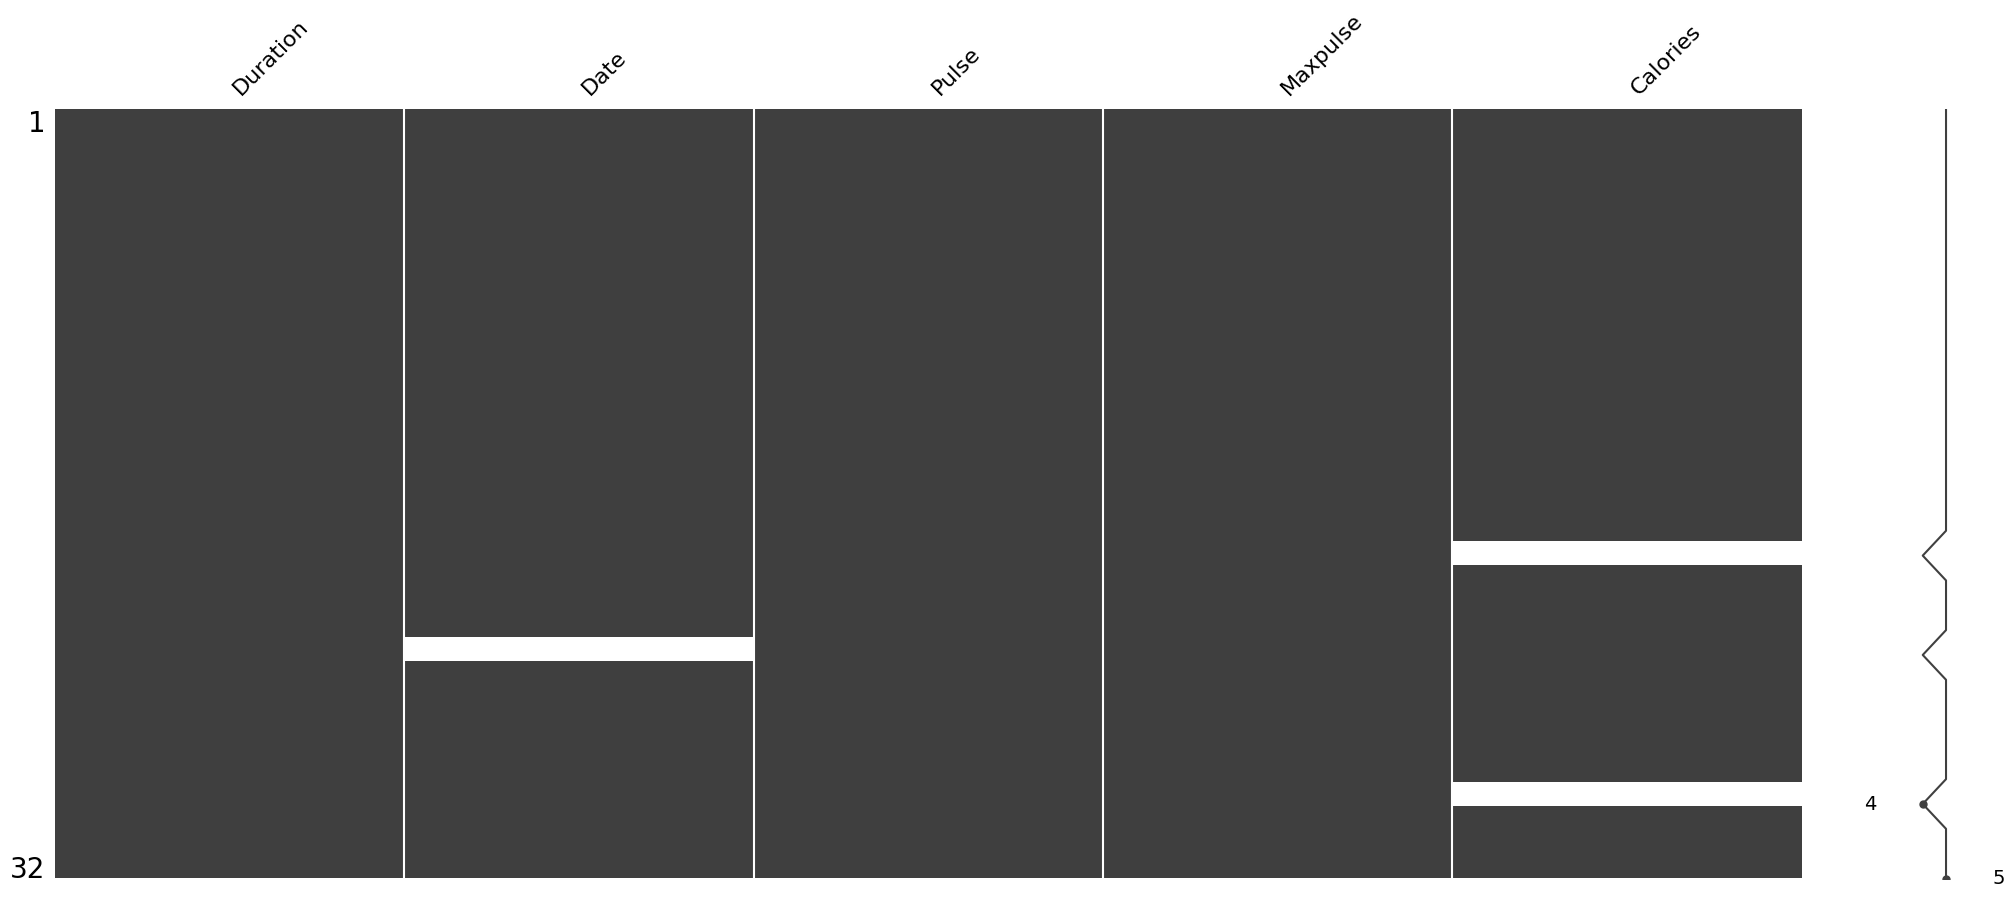

In [ ]:
# Heatmap of NA vals
import missingno as msno
msno.matrix(data)